# Visualize Pretraining Results

In [1]:
from plot import explore, patches_format
import numpy as np
import os
import plotly.io as pio
pio.renderers.default = "browser"
#pio.renderers.default = "jupyterlab"
import cv2
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.mplot3d import Axes3D

def get_ptcloud_img(ptcloud,roll,pitch, ax):
    x, y, z = ptcloud.transpose(1, 0)
    ax.axis('off')
    ax.set_box_aspect((np.ptp(x), np.ptp(y) , np.ptp(z)))     
    ax.view_init(roll,pitch)
    ax.scatter(x, y, z, zdir='z', s=0.05)

    return ax

def render_img(strig):
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    ax = plt.axes(projection=Axes3D.name)
    ax = get_ptcloud_img(original.reshape(-1,3), roll=0, pitch=0, ax=ax)
    plt.savefig(strig + "org" ".png", bbox_inches="tight", dpi=300, transparent=True)
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    ax = plt.axes(projection=Axes3D.name)
    ax = get_ptcloud_img(visible.reshape(-1,3), roll=0, pitch=0, ax=ax)
    plt.savefig(strig + "vis" ".png", bbox_inches="tight", dpi=300, transparent=True)
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    ax = plt.axes(projection=Axes3D.name)
    ax = get_ptcloud_img(all_rebuilt.reshape(-1,3), roll=0, pitch=0, ax=ax)
    plt.savefig(strig + "all" + ".png", bbox_inches="tight", dpi=300, transparent=True)


def discrete_cmap(N, base_cmap="hsv"):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return plt.cm.colors.ListedColormap(color_list, color_list, N)

def class_sampling(cluster, num=300):
    instances = np.unique(cluster[:,3])
    ls = []
    for instance in instances:
        pc = cluster[cluster[:,3] == instance]
        if len(pc) < num:
            choice = np.random.choice(len(pc), num, replace=True)
        else:
            choice = np.random.choice(len(pc), num, replace=False)
        ls.append(pc[choice])
    return np.vstack(ls)

def plt_offset(cluster, string): 
    fig = plt.figure(figsize=(5,5), constrained_layout=True)
    ax = plt.axes()
    sampled = class_sampling(cluster)
    x, y, z, c = sampled.transpose(1, 0)
    ax.axis('off')
    vals = np.unique(c)
    for i, val in enumerate(vals):
        c[c==val] = i
    ax.set_aspect('equal', adjustable='box')  
    ax.scatter(x, y, s=0.5,c=c, cmap="Accent")
    plt.savefig(string +".png", bbox_inches="tight", transparent=True, dpi=300)


In [ ]:
for i in range(11):
    string = f"treestring_{i}"
    write = True
    show = False
    if write:
        os.makedirs(f"plot/{string}", exist_ok=True)
    original = np.load(f"/user/jschnei2/backup/vis/{string}/full_original.npy").astype(np.float16)
    all_rebuilt = np.load(f"/user/jschnei2/backup/vis/{string}/full_rebuilt.npy").astype(np.float16)
    only_rebuilt = np.load(f"/user/jschnei2/backup/vis/{string}/only_rebuilt.npy").astype(np.float16)
    visible = np.load(f"/user/jschnei2/backup/vis/{string}/full_visible.npy").astype(np.float16)
    masked_points = np.load(f"/user/jschnei2/backup/vis/{string}/masked_points.npy").astype(np.float16)
    string = "reconstruction_small/" + string
    explore(patches_format(original), write=write, i=f"plot/{string}_original", show=show)
    explore(patches_format(all_rebuilt), write=write, i=f"plot/{string}_all_rebuilt", show=show)
    explore(patches_format(visible), write=write, i=f"plot/{string}_visible",show=show)
    explore(patches_format(only_rebuilt), write=write, i=f"plot/{string}_only_rebuilt", show=show)
    explore(patches_format(masked_points), write=write, i=f"plot/{string}_masked_points", show=show)
    render_img(f"plot/{string}")

# look at offset clusters

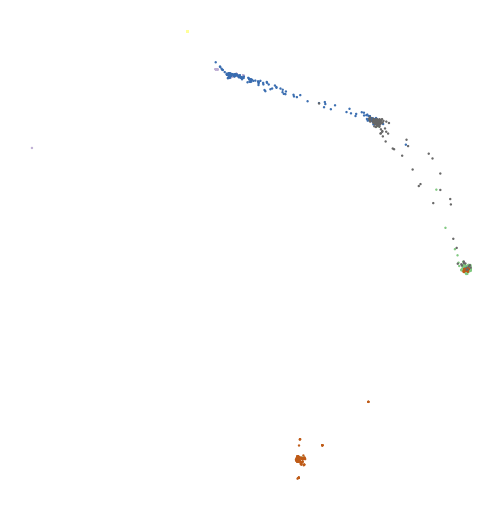

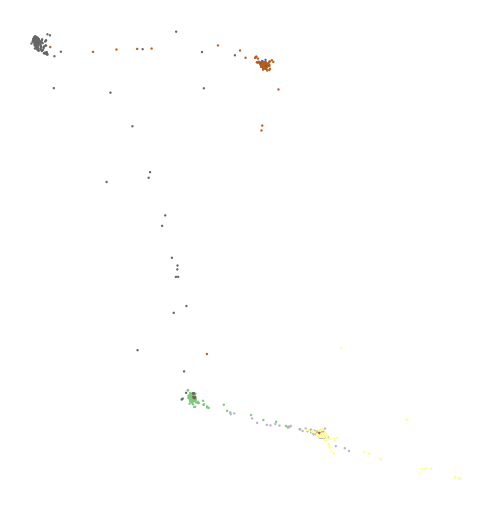

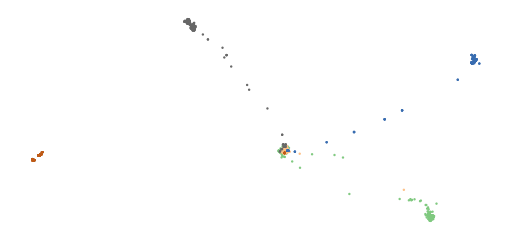

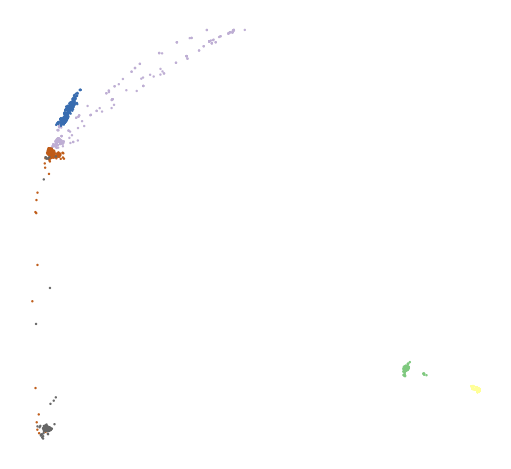

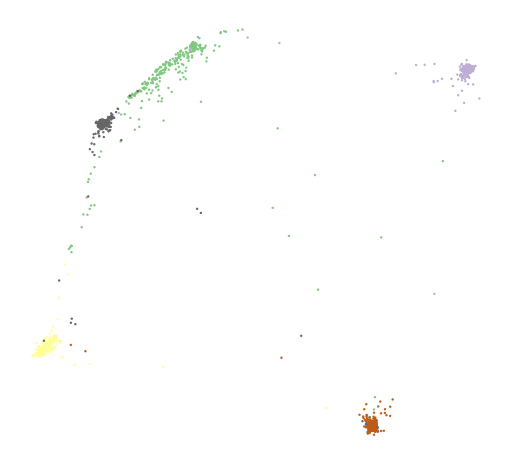

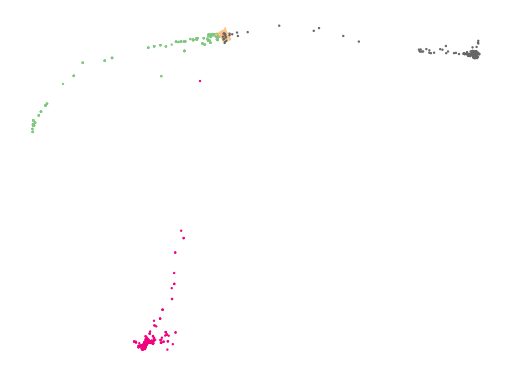

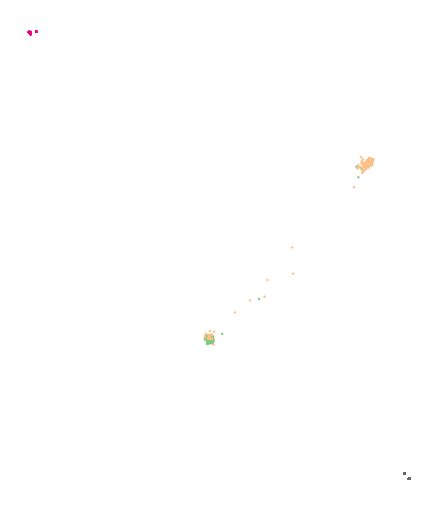

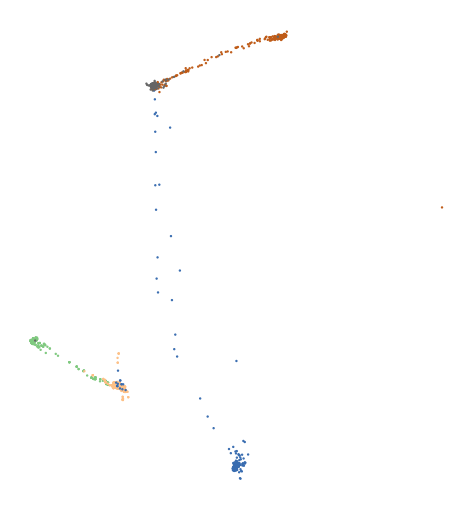

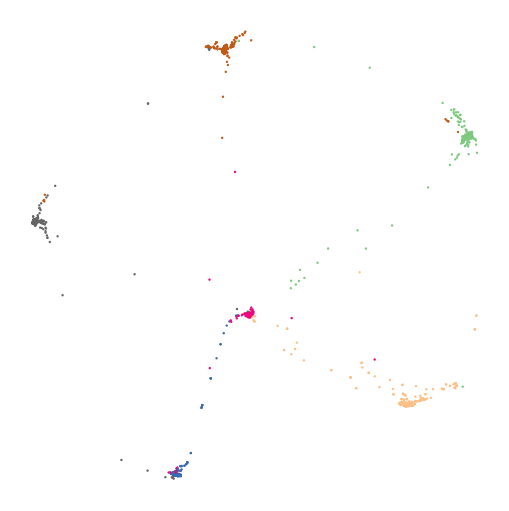

In [37]:
for i in range(9):
    string = f"treestring_{i}"
    write = True
    show = False
    cluster = np.load(f"/user/jschnei2/backup/vis/{string}/cluster.npy")
    points = np.load(f"/user/jschnei2/backup/vis/{string}/points.npy")
    offset = np.load(f"/user/jschnei2/backup/vis/{string}/offset.npy")
    true_offset = np.load(f"/user/jschnei2/backup/vis/{string}/true_offset.npy")
    string = f"plot/offset/treepoints_{i}"
    #if write:
    #    os.makedirs(string, exist_ok=True)

    #explore(cluster, write=write, i=string+"cluster", show=show)
    #explore(points, write=write, i=string+"points", show=show)
    plt_offset(cluster, string)
    np.mean(np.abs(offset[:,:2] - true_offset[:,:2])) *3

In [119]:
from sklearn.cluster import DBSCAN 
clustering = DBSCAN(eps=0.15,min_samples=10).fit(cluster[:,:3])
pred = np.hstack((cluster[:,:3], clustering.labels_[:,np.newaxis]+1))
np.unique(pred[:,3])

array([0., 1., 2., 3., 4., 5., 6.])

In [120]:
np.unique(pred[:,3], return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6.]),
 array([ 299,  408, 4293,  836,  602,  420,  167]))

In [121]:
np.unique(cluster[:,3], return_counts=True)

(array([146., 155., 237., 271., 273., 290., 292.]),
 array([ 980,    9,  278,  291, 4380,  426,  661]))

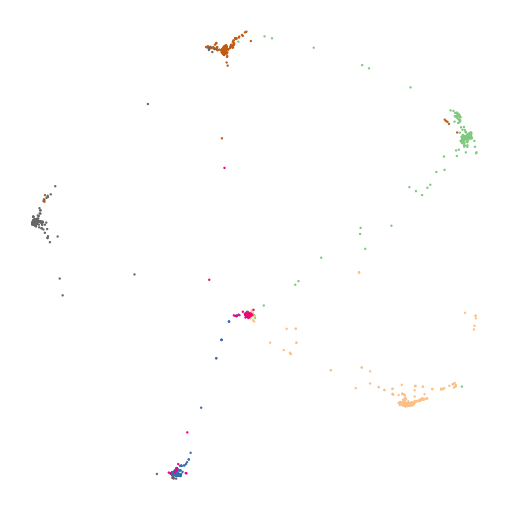

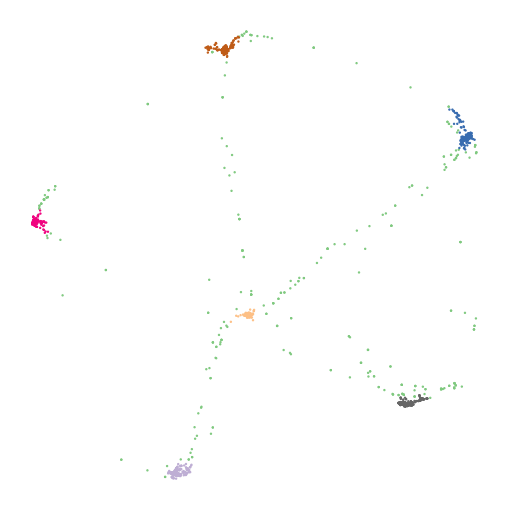

In [122]:
plt_offset(cluster, "test")
plt_offset(pred, "test")


In [79]:
pointspred = np.hstack((points[:,:3], clustering.labels_[:,np.newaxis]+1))
explore(pointspred)
 

# additional function for pretraining evaluation

In [17]:
# only look at region of tokens
label = 211
data = masked_points
G, N = data.shape[:2]
centers = np.mean(data, axis=1)
center_label =centers[label]
filter = np.sqrt(np.sum((centers - center_label)**2, axis=1)) < 0.3
data = patches_format(data).reshape(G, N, 4)[filter]
data = data.reshape(-1, 4)
explore(data, size_max=10)

0.2644998962019993

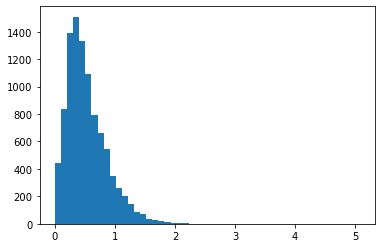

In [46]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

def process(ref, query, n_neighbors=32):
    knn = NearestNeighbors(n_neighbors=1)
    knn.fit(ref) 
    val, _ = knn.kneighbors(query, return_distance=True)
    return val
scaler = [10, 10, 22.5]
dist1, dist2 = [], []
for reb, mask in zip(only_rebuilt, masked_points):
    reb = reb.copy()
    mask = mask.copy()
    reb += 1
    mask += 1
    reb = reb * scaler
    mask = mask * scaler
    dist1.append(process(reb, mask))
    dist2.append(process(mask, reb))

dist = np.array(dist1).reshape(-1) + np.array(dist2).reshape(-1)
plt.hist(dist, bins=50)[2]
np.mean(dist1 + dist2)

# Classification evaluation
Note that
- Fichte: 0
- Douglasie: 1 
- Buche: 2
- Esche: 3
- Roteiche: 4

In [18]:
import numpy as np
import sklearn.metrics as met
import matplotlib.pyplot as plt
preds = np.load("/user/jschnei2/backup/experiments/classification/cls_treeset_fewshot/5shot/both/predictions.npy")
labels = np.load("/user/jschnei2/backup/experiments/classification/cls_treeset_fewshot/5shot/both/labels.npy")
treenames = np.array(["Spruce", "Doug. Fir", "Beech", "Red Oak"])
#treenames = np.array(["Spruce", "Doug. Fir", "Beech", "Ash", "Red Oak"])
cf_matrix = met.confusion_matrix(labels, preds)
cf_matrix_norm = met.confusion_matrix(labels, preds, normalize="true")

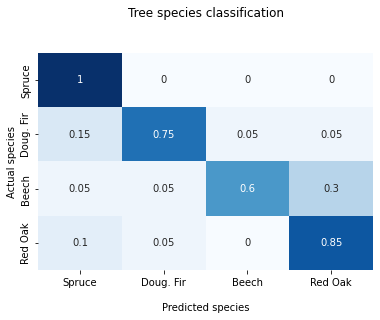

In [19]:
import seaborn as sns
def plot_cf(cf_matrix, path="output.svg"):  
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

    ax.set_title('Tree species classification\n\n')
    ax.set_xlabel('\nPredicted species')
    ax.set_ylabel('Actual species')

    ax.xaxis.set_ticklabels(treenames)
    ax.yaxis.set_ticklabels(treenames)
    plt.show()
    fig = ax.get_figure()
    fig.savefig(path, bbox_inches='tight', format="svg", transparent=True)

plot_cf(cf_matrix_norm, path="plot/cf_matrix_norm.svg")

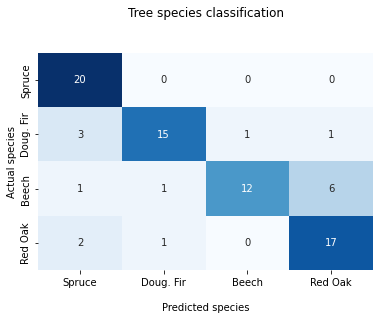

In [20]:
plot_cf(cf_matrix, path="plot/cf_matrix.svg")